#    Multi Layer Perceptrons
## Artificial Intelligence 1, week 9 

This week:
- recap on perceptrons
- perceptrons are linear classifiers
- multi-layer perceptrons
   - architecture
   - feed forward predictions
   - back propagation for training
   - examples
   

# Neurons - The basis of  Neural Networks

<div class="pull-right"><img src="https://github.com/jim-smith/lecture_resources/blob/master/neuron.jpg?raw=true"></div>
Perceptrons, invented by Frank Rosenblatt in the late 1950's,
are a form of supervised machine learning algorithm inspired by neuron cells.

In neurons, signals come in along the dendrites and out along the axon. 

A synapse is the connection between the axon of one cell and the dendrites of another.

Crudely, input signals are 'summed' and if they reach a certain threshold the neuron 'fires'
and sends a signal down the synapse to the
connected cells.





# Perceptrons - The basis of Artificial Neural Networks

<div class="pull-right"><img src="https://github.com/jim-smith/lecture_resources/blob/master/Perceptron.png?raw=true", width = 90%/></div>
Perceptrons are an algorithmic approximation of this process and can learn to solve simple classification problems.

Input values are multiplied by a learnable parameter called a *weight*.  
If the sum of the inputs $\times$ weights is over a certain threshold (0), 
the Perceptron 'fires' and generates an output.

To let us adapt the threshold in the same way as the weights we provide a *bias* signal.

We use the *error* in the output to change the value of the *weights* by a small amount - the *learning rate*.  
The process is repeated until the error is 0, or as small as we can get it.

**Note:** The threshold which determines if the Perceptron produces an output is determined by its *activation function*.  
For Perceptrons this is often a step function which outputs a 1 or 0 i.e. 'fires' or not. 


# Perceptrons Create Linear Decision Boundaries
<img src="figures/ML/straightLine.png" style="float:right" width:150>


### Perceptron's output changes when the sum of the weighted  inputs is 0  
So if we plot the output at different points in space there is a  *decision boundary*.     
This happens when  $input1 \times weight1 + input2 \times weight2 + biasweight = 0$

We can rearrange this equation to see that the change of behaviour happens when   
$input2 = - \frac{weight1}{ weight2} \times input1  - \frac{ biasweight}{ weight2}$

But this is just the equation for a straight line !
- slope (m) is given by -( weight1/ weight2)
- the intercept, c  = -( biasweight / weight2)

- step function => which side of the line is 1 or 0

So, the Perceptron is essentially learning a function for a straight line which is called the decision boundary.
In this case, which 'class' the set of inputs belongs to i.e. True or False.


In [1]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import numpy as np
from random import random
import ANN2_MLP_utils as utils
%matplotlib inline

  
weight1 = widgets.FloatSlider(value=-0.5,min = -1,max = 1)
weight2 = widgets.FloatSlider(value=0.5,min = -1,max = 1)
biasweight = widgets.FloatSlider(value=-0.5,min = -1,max = 1)
funcToModel = widgets.RadioButtons(options=['OR','AND','XOR'])
output=interact(utils.showPerceptron, w1=weight1,w2=weight2,bias=biasweight,func = funcToModel)

interactive(children=(FloatSlider(value=-0.5, description='w1', max=1.0, min=-1.0), FloatSlider(value=0.5, des…

## Perceptron Training Law
Every time you present an example you compare the output to the desired value,  
then update each weight in turn using:

    ∆ω_i = ε · i_i · α

    change in weight_i (for this example)
            = error (for this example)
              X input_i (for this example)
              X learning rate (fixed)

So this means that 
- Error = target-actual, can be negative 
- Weights only change when there is an error 
- Only active inputs are changed. 
- Inactive (x=0) inputs are not changed at all (which makes sense since they did not contribute to the error). 

See AI illuminated p297+ for a worked example

### In the next cell we will update the simple perceptron we created in week 7 to have an init and a  fit() method

In [2]:


class two_input_perceptron:
    def  __init__( self,learningRate):
        self.weight1 = random()
        self.weight2 = random()
        self.biasweight = random()
        self.learningRate = learningRate
        print(" starting with initial random weights {:.4f}, {:.4f} and {:.4f}".format(self.weight1,self.weight2,self.biasweight))
        
    def predict(self, input1, input2) -> int:
        summedInput = input1*self.weight1 +input2*self.weight2 + 1*self.biasweight #bias is always +1
        if summedInput>0:
            return 1
        else:
            return 0

    def update_weights( self, in1, in2, target):
        error = target - self.predict(in1,in2)
        if(error == 0):
            return 0
        else:
            self.biasweight += error * 1   * self.learningRate # bias is always +1
            self.weight1    += error * in1 * self.learningRate
            self.weight2    += error * in2 * self.learningRate           
            return 1
                
    def fit(self,train_X,train_y, maxEpochs,verbose=True):
        for epoch in range (maxEpochs):
            errors = 0
            for testcase in range (len(train_y)):
                errors += self.update_weights(train_X[testcase][0], train_X[testcase][1],train_y[testcase])
            if(errors >0):
                if( epoch < (maxEpochs-1) and verbose):
                    print(" in epoch {} there were {} errors".format(epoch,errors))
                elif(epoch==maxEpochs-1):
                    print(" after {} epochs there were still {} errors".format(epoch,errors))
            else:
                print(" Perceptron solved the learning problem in {} epochs".format(epoch))
                break
    def getWeights(self):
        return self.biasweight, self.weight1, self.weight2
                
        
            

In [6]:
train_X = np.asarray( [[0,0],[0,1],[1,0],[1,1]])

and_y = [0,0,0,1]
or_y = [0,1,1,1]
xor_y = [0,1,1,0]

print('Learning AND')
myPerceptron = two_input_perceptron(0.1)
myPerceptron.fit(train_X,and_y, 20)

Learning AND
 starting with initial random weights 0.7569, 0.1793 and 0.6809
 in epoch 0 there were 3 errors
 in epoch 1 there were 3 errors
 in epoch 2 there were 2 errors
 in epoch 3 there were 1 errors
 in epoch 4 there were 2 errors
 in epoch 5 there were 1 errors
 Perceptron solved the learning problem in 6 epochs


In [9]:

print('\nLearning OR')
myPerceptron3 = two_input_perceptron(0.1)
myPerceptron3.fit(train_X,or_y, 20,verbose=False)


print('Learning XOR')
myPerceptron2 = two_input_perceptron(0.1)
myPerceptron2.fit(train_X,xor_y, 1000,verbose=False)



Learning OR
 starting with initial random weights 0.4354, 0.8100 and 0.0869
 Perceptron solved the learning problem in 1 epochs
Learning XOR
 starting with initial random weights 0.6443, 0.3318 and 0.1456
 after 999 epochs there were still 4 errors


### Perceptrons - Training and Testing on Real-Fake Data

Truth table data and logical functions are a good way to learn the Perceptron algorithm but the data isn't very realistic.

Most problems are much more complex and cannot be represented with binary data or solved with only 4 training examples.  
We were also only training for one **step** (one input example) or one **epoch** (all input examples) at a time, so that we
could see what the algorithm was doing.

In supervised learning, generally we want to stop training either:
- when there is no improvement in the number of errors on the training data
- or after some fixed number of epochs

Once training is finished we apply the model (trained weights) to some test data and
measure its performance.  
This gives us an indication of how well it would perform on new data it has not 'seen' before.

In [10]:
# Import some needed modules
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# Generate random dataset
num_samples = 150
features, labels = make_blobs(n_samples=num_samples, centers=2, n_features=2, cluster_std=1.25, random_state=0)

# Split data to training and test data, 2/3 for training and 1/3 for testing
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.33)

# Print some information about the data
print("Shape of training data: " + str(train_x.shape))
print("Shape of test data: " + str(test_x.shape))
print("First 5 rows of training data:")
print(train_x[: 5, :])
print("First 5 labels of training data:")
print(train_y[:5])



Shape of training data: (100, 2)
Shape of test data: (50, 2)
First 5 rows of training data:
[[0.52347312 1.95311738]
 [2.91754023 2.52497145]
 [1.93220187 0.0683158 ]
 [1.19020521 2.81813498]
 [1.47127847 2.93746044]]
First 5 labels of training data:
[1 1 1 1 0]


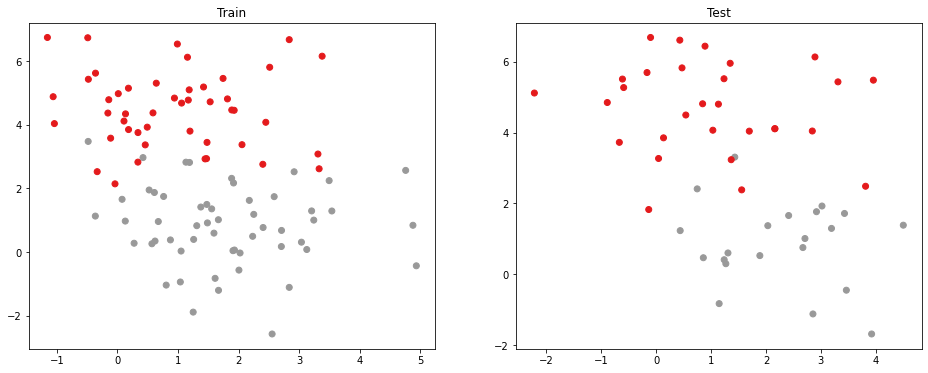

In [11]:
# Plot the training data
figure, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(x=train_x[:,0], y=train_x[:,1], c=train_y,cmap='Set1')
ax[0].title.set_text("Train")
ax[1].scatter(x=test_x[:,0], y=test_x[:,1], c=test_y,cmap='Set1')
ax[1].title.set_text("Test")

In [14]:
myPerceptron = two_input_perceptron(0.1)
myPerceptron.fit(train_x,train_y, 50,verbose=True)

 starting with initial random weights 0.1460, 0.9959 and 0.1020
 in epoch 0 there were 21 errors
 in epoch 1 there were 16 errors
 in epoch 2 there were 14 errors
 in epoch 3 there were 12 errors
 in epoch 4 there were 15 errors
 in epoch 5 there were 10 errors
 in epoch 6 there were 12 errors
 in epoch 7 there were 9 errors
 in epoch 8 there were 10 errors
 in epoch 9 there were 11 errors
 in epoch 10 there were 10 errors
 in epoch 11 there were 10 errors
 in epoch 12 there were 8 errors
 in epoch 13 there were 10 errors
 in epoch 14 there were 11 errors
 in epoch 15 there were 10 errors
 in epoch 16 there were 10 errors
 in epoch 17 there were 8 errors
 in epoch 18 there were 11 errors
 in epoch 19 there were 10 errors
 in epoch 20 there were 8 errors
 in epoch 21 there were 10 errors
 in epoch 22 there were 12 errors
 in epoch 23 there were 12 errors
 in epoch 24 there were 12 errors
 in epoch 25 there were 12 errors
 in epoch 26 there were 9 errors
 in epoch 27 there were 10 errors

Trained model weights:w1: 0.4018523609073799 w2: -0.9505437186411629 bw: 2.1019780341078746


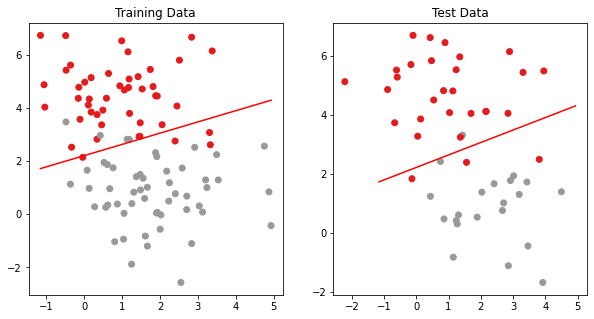

In [15]:
bias_w,w1,w2= myPerceptron.getWeights()
print("Trained model weights:w1: " + str(w1) + " w2: " + str(w2) + " bw: " + str(bias_w))

# Create the range of values for decision boundary
x_range = np.linspace(train_x[:,0].min(), train_x[:,0].max(), 10)
y_range = [((-w1/w2) * x) + (-bias_w/w2) for x in x_range]
# Plot the training and test data and the decision boundary
figure, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].scatter(train_x[:,0], train_x[:,1], c=train_y,cmap='Set1')
ax[0].set_title("Training Data")
ax[0].plot(x_range, y_range, color='r')
ax[1].scatter(test_x[:,0],test_x[:,1],c=test_y,cmap='Set1')
ax[1].set_title("Test Data")
_=ax[1].plot(x_range, y_range, color='r')


## Do you understand why the test set accuracy is a better estimate than the training set accuracy?









## Going beyond single straight decision boundaries
<div style="float: right; width: 50%">
<img align="right", src="https://github.com/jim-smith/lecture_resources/blob/master/mlp.png?raw=truem", width = 75%/,height=40%/>
    </div>Some problems need more than one single decision boundary, or  curved (non-linear) boundaries.

So we need a more flexible architecture made out of the same building blocks.

Multi-Layer Perceptrons (MLPs) have:
* lots of connected perceptrons with trainable weights arranged in layers.
* calculations flow layer-by-layer from inputs to outputs

At the output layers we know the targets and the computed activations 
* so we can use the perceptron training rule to adjust the last set of weights
* But we need some adjustment to know how to adjust the weights from inputs to hidden layer nodes

### Changing the activation function to tell us what the actual input signal was
<div style="float: right; width: 50%"><img src="https://github.com/jim-smith/lecture_resources/blob/master/sigmoid.png?raw=true", width = 80%/></div>
Instead of using a step function which loses all the detail, we use something with one-to-one mapping

Several options, most common is the sigmoid $\sigma(x)$

$ output = \sigma(input)$

 $ \;\;\;\;\;\;= \frac{1}{ 1+e^{-input}}$
 
 Which has the nice property that it's derivative (useful for working backwards) is $\sigma(x) (1- \sigma(x))$

Nowadays people also use **relu** activation: $relu(x) = MAX(0,x)$

### Back-propagation of errors according to their causes 
Since we don’t know what the ‘expected’ output of the hidden layer is, we cannot calculate the error.

Instead, we share out the error from an output neurone to each hidden neurones.

We do this in proportion to the strength of the signal coming from that hidden neurone. 

In practice we can feed in lots of samples then take the average of their errors

### Back-propagations is now commonly called "Stochastic Gradient Descent" to reflect the fact that it is just a local search algorithm



## MLP Predicting output for a sample with activation 1/(1+input)
<img style="float:right" width=50% src="figures/ML/mlp-prediction.png">

**Input to node h1** = $w_1x_1 + w_3x_2$

**Output from node h1** = $\sigma(w_1x_1 +w_3x_2)$

**Input to node h2** = $w_2x_1 + w_4x_2$

**Output from node h2** = $ \sigma(w_2x_1 + w_4x_2)$

**Input to output node O** = $ w5\ \sigma(w_1x_1 + w_2x_2)  + w6\ \sigma(w_2x_1 + w_4x_2)$

**Output O** =   $ \sigma( \ w5\ \sigma(w_1x_1 + w_2x_2)  + w6\ \sigma(w_2x_1 + w_4x_2) ) $

 
In production code  we can represent the signals (inputs, each layer of hidden nodes, output nodes) as  vectors and the weights between each layer as a matrix

Then we can do the whole thing as a sequence of vector-matrix multiplications: **which is exactly what GPUs are designed to do extremely efficiently!!**


### MLP: error back propagation for weight updates with a single sample     <img style="float:right" width=40% src="figures/ML/mlp-errors.png">

Step 1. Updates weights to final layer using 'real' diference between target and output
- change in w5 = error * output from H1 * learning rate   
  = $E1 * \sigma(w_1x_1 +w_2x_2) * \alpha$  
  
- change in w6 = error * output from H2  * learning rate.  
  = $ E1 *  \sigma(w_2x_1 + w_4x_2) * \alpha$
  


Step 2. Calculate share of error to feed back to hidden nodes
-  E2 = (signal to Output from h1)/ (total signal input to Output)  
  = $\frac {\sigma(w_1x_1 +w_2x_2) }{ \sigma(w_1x_1 +w_2x_2) +\sigma(w_2x_1 + w_4x_2 )}$  
- similar for E3

3. Use these to update w1, w3 like perceptron training

4. Same process for rest of network

# What does this look like in code?

As we mentioned above, it is 'cleanest' to implement this using vector and matrix algebra

There are many toolkits that do this - prehaps the best known is Google's tensorflow

Nowadays libraries like keras let us hide many of the details to provide a quick clean coding interface
with *lots* of options

For now we will use the sklearn implemntation:
`class sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)[source]`

# Setting up the final layer of  our network for the type of labels 
- For a binary problem:
    - we have *one* output node with sigmoid (logistic) activation,
     - and  interpret its output as the probabilty that the item belongs to class 1
    - usually threshold at 0.5 to make a prediction, but probabilities can be informative
- For a  problem with M>2 classes:
    - we usually have M output nodes
    - 'onehot' encoding for y  
       e.g. 0 1 0 0 instead of '2'
    - 'softmax' ('all or nothing') activation function for final layer  
      e.g. node ouptuts (0.2 0.5 0.4 0.6) get transformed to (0 0 0 1)
- For regression problem:
    - usually one output node with a linear activation  
      e.g. output = summed weighted inputs
    

Estimated accuracy using the test set is 50.0 %


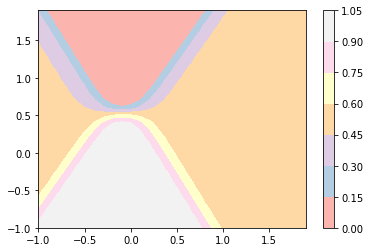

In [19]:
from sklearn.neural_network import MLPClassifier
xor_X = np.asarray( [[0,0],[0,1],[1,0],[1,1]])
xor_y = [0,1,1,0]#XOR

# one hidden layer with 5 neurons logistic (sigmoid) activation and Stochastic Gradient Descent (backprop)
xorMLP = MLPClassifier( hidden_layer_sizes = (2),activation='logistic',solver='lbfgs')
xorMLP.fit(xor_X,xor_y)

accuracy = 100*  xorMLP.score(xor_X,xor_y)
print('Estimated accuracy using the test set is {} %'.format(accuracy))
utils.plotDecisionSurface(xorMLP,xor_X,xor_y)


/Users/j4-smith/Documents/teaching_20-21/AI1/AIenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Estimated accuracy using the test set is 100.0 %


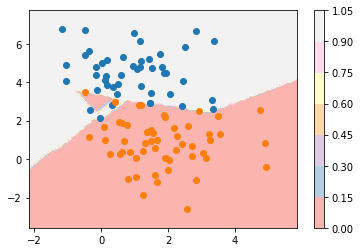

In [25]:
# and for the blob data
# one hidden layer with 5 neurons logistic (sigmoid) activation and Stochastic Gradient Descent (backprop)
continuousMLP = MLPClassifier( hidden_layer_sizes = (10,10),activation='logistic',solver='lbfgs')
continuousMLP.fit(train_x,train_y)

accuracy = 100*  continuousMLP.score(train_x,train_y)
print('Estimated accuracy using the test set is {} %'.format(accuracy))
utils.plotDecisionSurface(continuousMLP,train_x,train_y)

# And it's trivial to add more hidden nodes or add layers if we want to ...

## Multi-Layer Perceptrons  today

<img src = "https://upload.wikimedia.org/wikipedia/commons/2/26/Deep_Learning.jpg" style="float:right" width = 400>

Since the 1980s Artificial Neural Networks have been hugely successful,   
across a range of classification, regression and control problems.

Only problems with MLPs were:
- reliance on creating appropriate features 
- reliance on  appropriate scaling
- lack of interpretablility


Deep Neural Networks:   MLP with >5 hidden layers

Typically complex early layers to find/create features such as:
- Convolutional Layers discover spatial patterns e.g. 1D,   2D (images) N-D (video)  
  each node acts like a small loical pattern detecting filter that 'sweeps over' the image 
- Recurrent Layers discover patterns in time e.g. speech recognition, natural language processing  
  each node has a memory and (often) a 'forget-gate' that responds to patterns  
  e.g. speech marks `"`in text or `/*` and `*/` for comments in code 

Because they have more weights to learn appropriate values for, Deep Networks need:
- *lots* of data, 
- *lots* of computational power / time to train

Deep Neural Networks useually have one or more  "dense" layers (like in a MLP) before the output

## A simple deep convolutional network for the MNIST data
<img src="https://miro.medium.com/max/3744/1*SGPGG7oeSvVlV5sOSQ2iZw.png" width = 1200>
image from https://towardsdatascience.com/mnist-handwritten-digits-classification-using-a-convolutional-neural-network-cnn-af5fafbc35e9


# Summary
The perceptron training algorithm is guaranteed to converge on a solution – if one exists.  
 - But this will only be the case for linearly separable problems.
 - and if more than one decision voundary separates the data, there are no guarantees which you will get

Multi-Layer Perceptrons solve this problem by combining perceptrons in a layered structure
- The network is capable of learning making non-linear decision boundaries
- Activation functions changed from a step, to something that preserves more information sigmoid (logistic)  
  so you can make big[small] changes to weights leading to a hidden node if it's summed inputs were   lots [a little] over the 'trigger point'

Backpropagation (Stochastic Gradient Descent)) is the algorithm used to train the more complex, multi layered networks
- **signals propagate forwards** through the network.
- **errors are propagated backwards** through the network. 
- For a given input, hidden nodes receive an error signal *in proportion to* the strength of their forwards signal
- It is a form of local search so can get stuck on local optima 

Deep Neural Networks are MLP with extra layers to learn features from complex data